In [1]:
import os
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import time

In [2]:
# Spotify API credentials
client_id = '
client_secret = ''

In [3]:
# Initialize Spotify client
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
# Functions
def get_tracks(sp, query, limit=50, offset=0):
    try:
        results = sp.search(q=query, type='track', limit=limit, offset=offset)
        return results['tracks']['items']
    except Exception as e:
        print(f"Error fetching tracks: {e}")
        return []

In [5]:
def get_track_info(track, genre):
    try:
        track_info = {
            'id': track['id'],
            'name': track['name'],
            'album': track['album']['name'],
            'artist': ", ".join([artist['name'] for artist in track['artists']]),
            'popularity': track['popularity'],
            'release_date': track['album']['release_date'],
            'duration_ms': track['duration_ms'],
            'explicit': track['explicit'],
            'genre': genre
        }
        return track_info
    except KeyError as e:
        print(f"Error extracting track info: {e}")
        return None

In [6]:
# Main function
def main():
    track_list = []
    genres = ['pop', 'rock', 'hip-hop', 'country', 'jazz', 'electronic']  # Focusing on genres likely to have English songs
    query_template = 'genre:{}'

    total_tracks_needed = 10000
    tracks_per_genre = total_tracks_needed // len(genres)

    seen_tracks = set()  # To store IDs of tracks already added

    for genre in genres:
        query = query_template.format(genre)
        genre_track_count = 0
        offset = 0
        print(f"Fetching tracks for genre: {genre}")
        
        while genre_track_count < tracks_per_genre:
            tracks = get_tracks(sp, query, limit=50, offset=offset)
            if not tracks:  # If no tracks were fetched, stop the iteration
                print(f"No more tracks found for genre: {genre}")
                break
            
            for track in tracks:
                if track['id'] not in seen_tracks:  # Ensure no duplicate tracks
                    track_info = get_track_info(track, genre)
                    if track_info:
                        track_list.append(track_info)
                        seen_tracks.add(track['id'])
                        genre_track_count += 1
                        if len(track_list) >= total_tracks_needed:
                            break
            
            if len(track_list) >= total_tracks_needed:
                break

            offset += 50  # Move to the next set of results
            time.sleep(1)  # Pause to avoid hitting API rate limits

    # Create a DataFrame and save to CSV
    if track_list:
        df = pd.DataFrame(track_list)
        df.to_csv('english_spotify_tracks.csv', index=False)
        print(f"Saved {len(df)} tracks to english_spotify_tracks.csv")
    else:
        print("No tracks were fetched.")

if __name__ == '__main__':
    main()

Fetching tracks for genre: pop


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:pop', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Error fetching tracks: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Apop&limit=50&offset=1000&type=track:
 Bad request., reason: None
No more tracks found for genre: pop
Fetching tracks for genre: rock


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:rock', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Error fetching tracks: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Arock&limit=50&offset=1000&type=track:
 Bad request., reason: None
No more tracks found for genre: rock
Fetching tracks for genre: hip-hop


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:hip-hop', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Error fetching tracks: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Ahip-hop&limit=50&offset=1000&type=track:
 Bad request., reason: None
No more tracks found for genre: hip-hop
Fetching tracks for genre: country


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:country', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Error fetching tracks: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Acountry&limit=50&offset=1000&type=track:
 Bad request., reason: None
No more tracks found for genre: country
Fetching tracks for genre: jazz


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:jazz', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Error fetching tracks: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Ajazz&limit=50&offset=1000&type=track:
 Bad request., reason: None
No more tracks found for genre: jazz
Fetching tracks for genre: electronic


HTTP Error for GET to https://api.spotify.com/v1/search with Params: {'q': 'genre:electronic', 'limit': 50, 'offset': 1000, 'type': 'track', 'market': None} returned 400 due to Bad request.


Error fetching tracks: http status: 400, code:-1 - https://api.spotify.com/v1/search?q=genre%3Aelectronic&limit=50&offset=1000&type=track:
 Bad request., reason: None
No more tracks found for genre: electronic
Saved 5488 tracks to english_spotify_tracks.csv


In [7]:
df = pd.read_csv(r"C:\Users\rocke\python\english_spotify_tracks.csv")
df

,id,name,album,artist,popularity,release_date,duration_ms,explicit,genre
0,0WbMK4wrZ1wFSty9F7FCgu,"Good Luck, Babe!","Good Luck, Babe!",Chappell Roan,96,2024-04-05,218423,False,pop
1,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,100,2024-05-17,210373,False,pop
2,7221xIgOnuakPdLqT0F3nP,I Had Some Help (Feat. Morgan Wallen),I Had Some Help,"Post Malone, Morgan Wallen",94,2024-05-10,178205,True,pop
3,5N3hjp1WNayUPZrA8kJmJP,Please Please Please,Please Please Please,Sabrina Carpenter,97,2024-06-06,186365,True,pop
4,2qSkIjg1o9h3YT9RAgYN75,Espresso,Espresso,Sabrina Carpenter,98,2024-04-12,175459,True,pop
...,...,...,...,...,...,...,...,...,...
5483,4Z4i631BesV0P6LTvfLAdL,Talk to Me You'll Understand,You'll Understand,Ross from Friends,49,2017-02-10,417099,False,electronic
5484,3cT2knV4AvpBPGUmYxIonh,The Wozard Of Iz,Wildflower,The Avalanches,40,2016-07-08,179880,True,electronic
5485,3yH2YuRNJcXfwjgd7nFIMX,Next To You,Next To You,"Excision, Amidy",40,2023-10-13,196233,False,electronic
5486,6WyCcfyNXUESDqULC0Zdxn,Music To My Ears (feat. Tory Lanez),Cura,"Keys N Krates, Tory Lanez",40,2018-02-02,193043,True,electronic


In [8]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id              0
name            0
album           0
artist          0
popularity      0
release_date    0
duration_ms     0
explicit        0
genre           0
dtype: int64


In [9]:
df.dropna(inplace=True)

In [10]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
id              0
name            0
album           0
artist          0
popularity      0
release_date    0
duration_ms     0
explicit        0
genre           0
dtype: int64


In [11]:
df.duplicated().sum()

0

In [12]:
df.shape

(5488, 9)

In [13]:
df.drop('id', axis=1, inplace=True, errors='ignore')

In [14]:
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

In [15]:
# Handling Missing Values
missing_values = df.isnull().sum()
# Summary statistics for numerical columns
num_summary = df.describe()

# Summary statistics for categorical columns
cat_summary = df.describe(include=['object', 'bool'])

missing_values, num_summary, cat_summary

(name            0
 album           0
 artist          0
 popularity      0
 release_date    0
 duration_ms     0
 explicit        0
 genre           0
 dtype: int64,
         popularity    duration_ms
 count  5488.000000    5488.000000
 mean     65.262937  221546.980867
 std      12.804168   66936.702962
 min       8.000000   41487.000000
 25%      55.000000  181299.000000
 50%      68.000000  212353.000000
 75%      75.000000  251210.000000
 max     100.000000  941360.000000,
                                             name                   album  \
 count                                       5488                    5488   
 unique                                      5043                    3566   
 top     California Sober (Feat. Chris Stapleton)  F-1 Trillion: Long Bed   
 freq                                           6                      54   
 
             artist explicit genre  
 count         5488     5488  5488  
 unique        2484        2     6  
 top     Zach Bryan

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Set up the visualizations
sns.set(style="whitegrid")

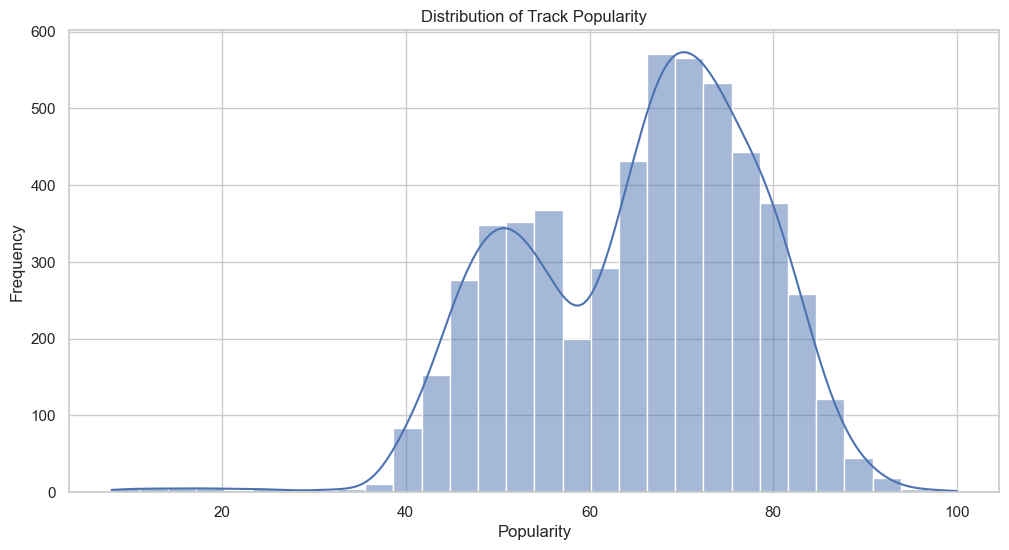

In [18]:
# Plot 1: Distribution of Popularity
plt.figure(figsize=(12, 6))
sns.histplot(df['popularity'], bins=30, kde=True)
plt.title('Distribution of Track Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.show()

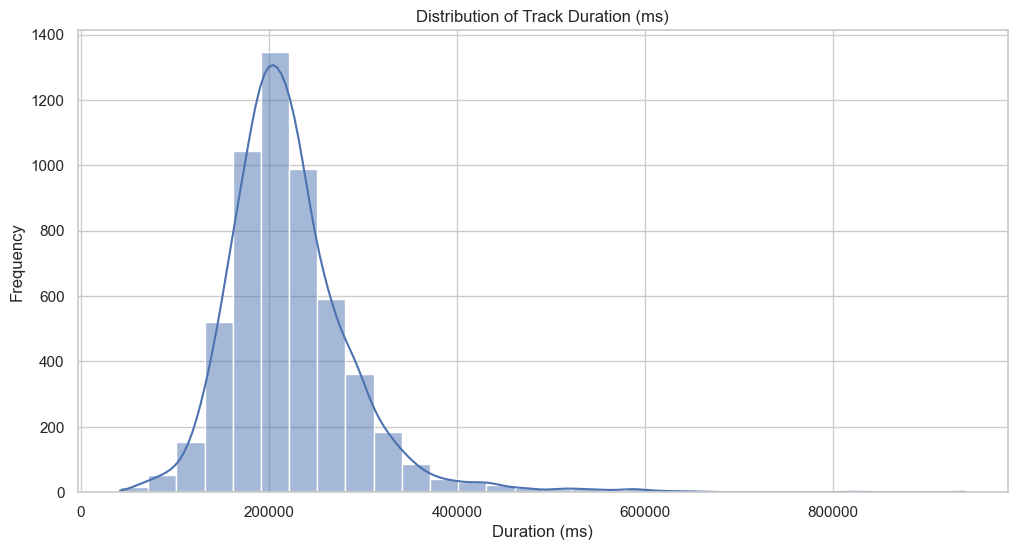

In [19]:
# Plot 2: Distribution of Duration (ms)
plt.figure(figsize=(12, 6))
sns.histplot(df['duration_ms'], bins=30, kde=True)
plt.title('Distribution of Track Duration (ms)')
plt.xlabel('Duration (ms)')
plt.ylabel('Frequency')
plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\3329045478.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')


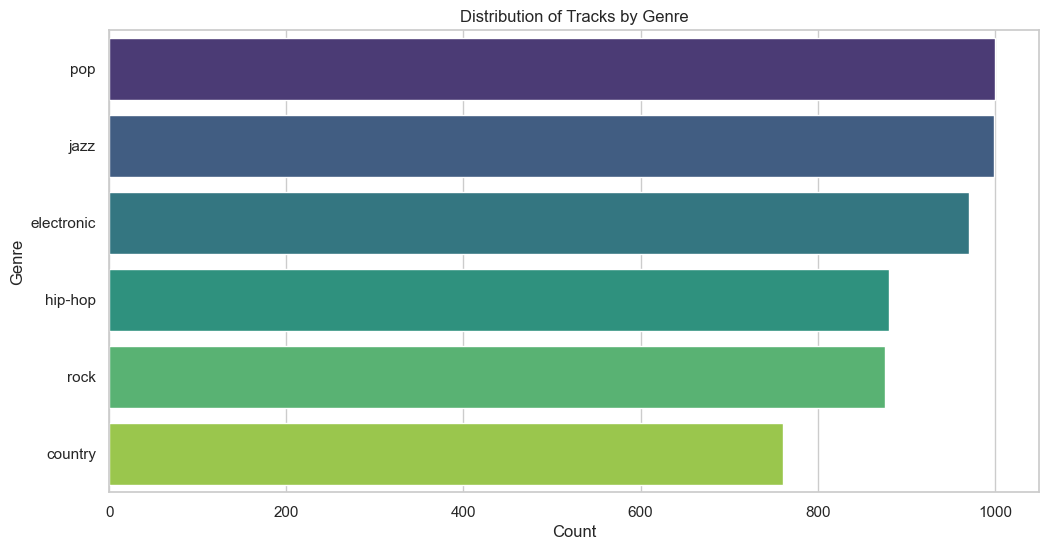

In [20]:
# Plot 3: Genre Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index, palette='viridis')
plt.title('Distribution of Tracks by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\1101828329.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


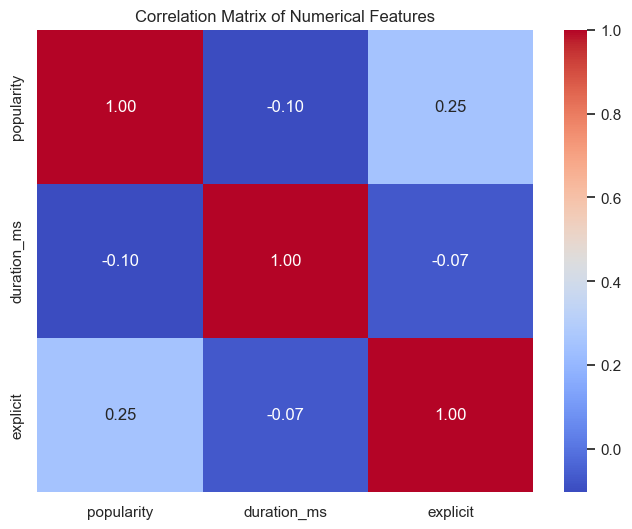

In [21]:
# Plot 4: Correlation Matrix
plt.figure(figsize=(8, 6))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\3546337387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='genre', y='popularity', data=df, palette='viridis')


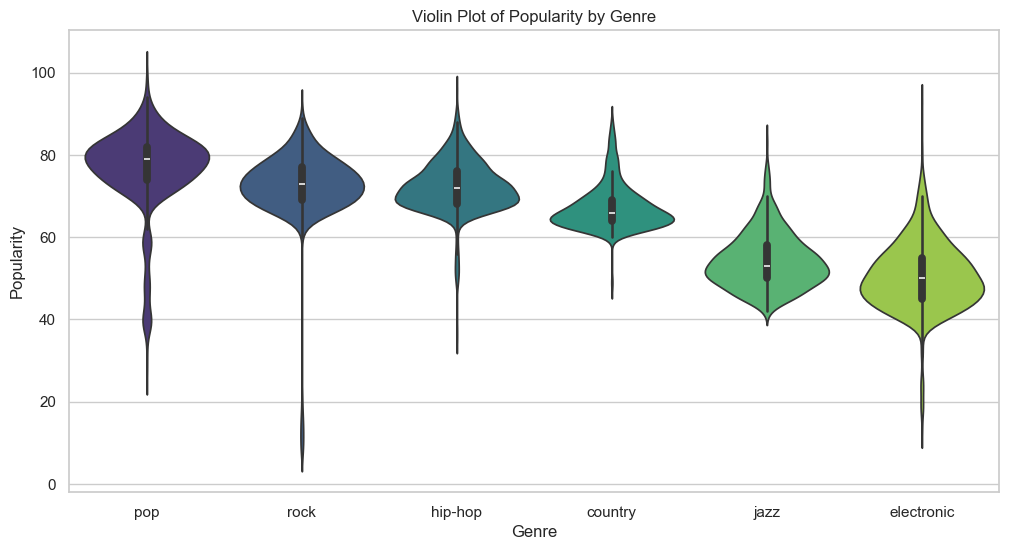

In [22]:
# Violin Plot for Popularity by Genre
plt.figure(figsize=(12, 6))
sns.violinplot(x='genre', y='popularity', data=df, palette='viridis')
plt.title('Violin Plot of Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\627723669.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='genre', y='duration_ms', data=df, palette='viridis')


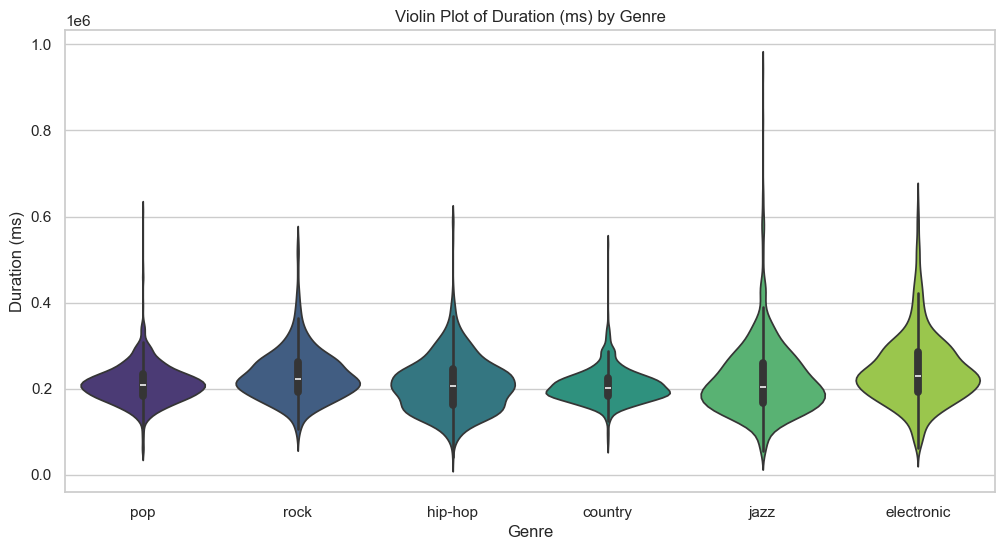

In [23]:
# Violin Plot for Duration by Genre
plt.figure(figsize=(12, 6))
sns.violinplot(x='genre', y='duration_ms', data=df, palette='viridis')
plt.title('Violin Plot of Duration (ms) by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (ms)')
plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\2563568784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='popularity', data=df, palette='viridis')


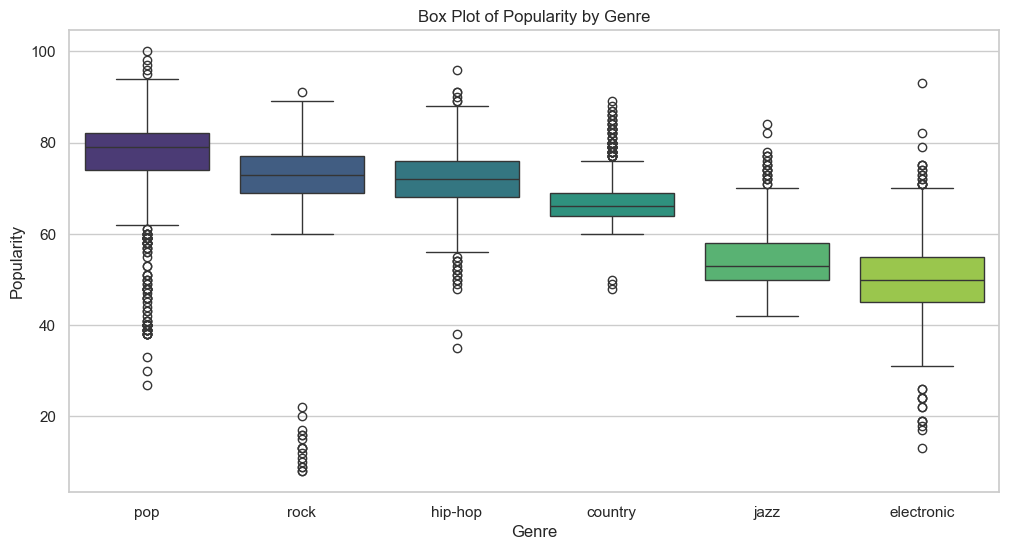

In [24]:
# Box Plot for Popularity by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='popularity', data=df, palette='viridis')
plt.title('Box Plot of Popularity by Genre')
plt.xlabel('Genre')
plt.ylabel('Popularity')
plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\293690070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='genre', y='duration_ms', data=df, palette='viridis')


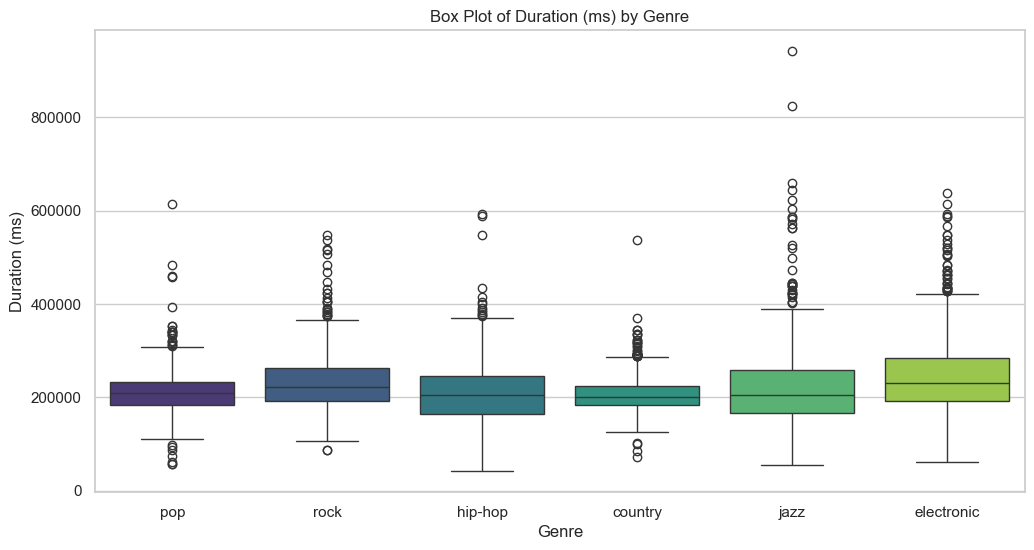

In [25]:
# Box Plot for Duration by Genre
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='duration_ms', data=df, palette='viridis')
plt.title('Box Plot of Duration (ms) by Genre')
plt.xlabel('Genre')
plt.ylabel('Duration (ms)')
plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\131533643.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


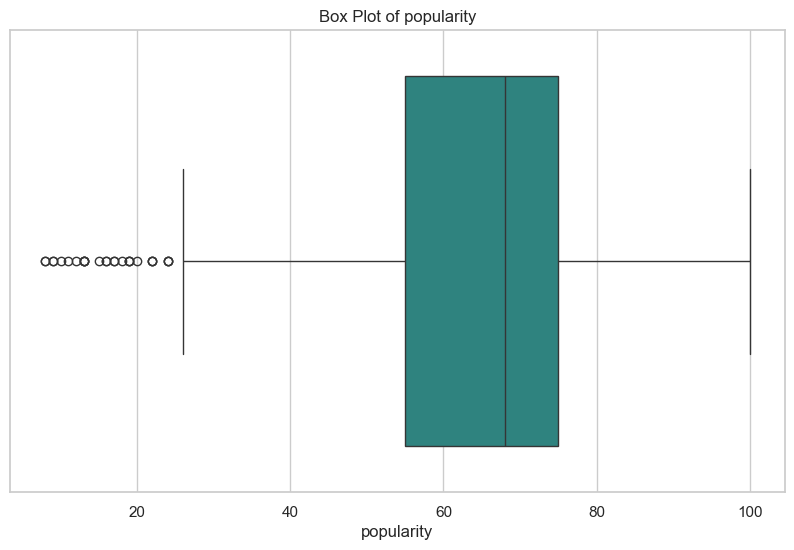

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\131533643.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')


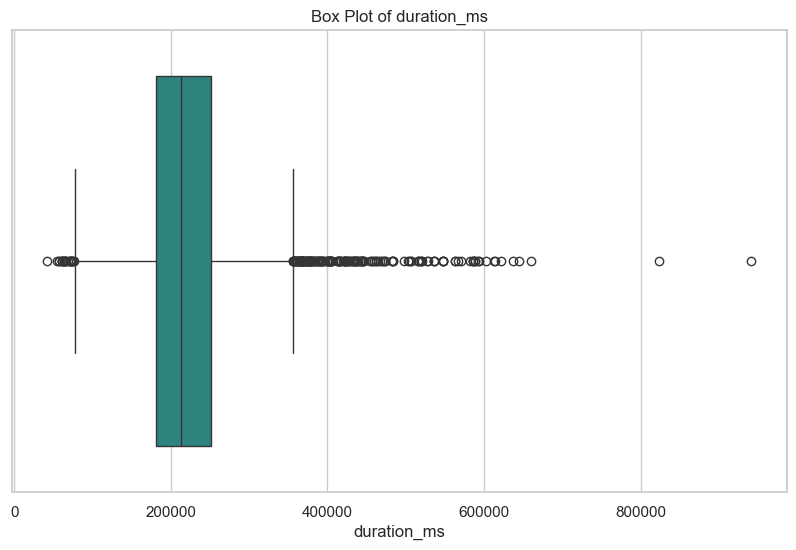

In [26]:
# List of numerical columns
numerical_columns = ['popularity', 'duration_ms']

# Create box plots for each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col], palette='viridis')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.show()

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\2904244121.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_outliers[col], palette='viridis')


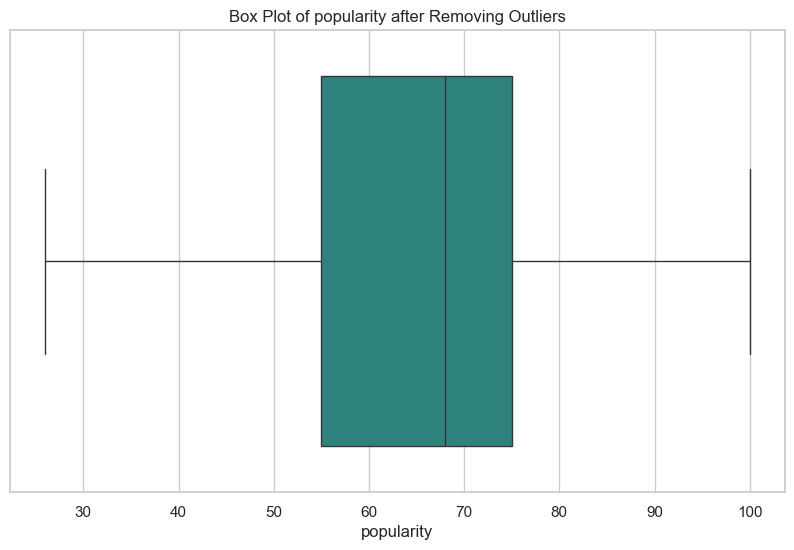

C:\Users\rocke\AppData\Local\Temp\ipykernel_29912\2904244121.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_no_outliers[col], palette='viridis')


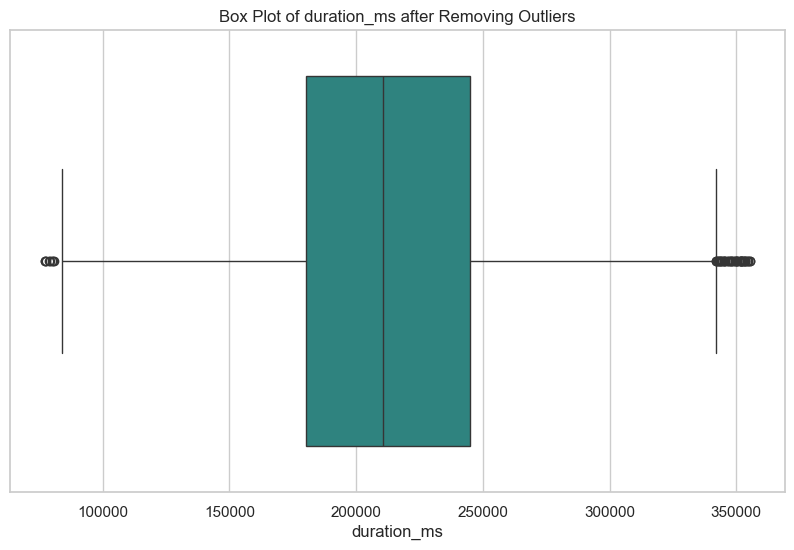

In [27]:
# List of numerical columns
numerical_columns = ['popularity', 'duration_ms']

# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply to each numerical column and plot
df_no_outliers = df.copy()
for col in numerical_columns:
    df_no_outliers = remove_outliers(df_no_outliers, col)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df_no_outliers[col], palette='viridis')
    plt.title(f'Box Plot of {col} after Removing Outliers')
    plt.xlabel(col)
    plt.show()

In [28]:
# Perform one-hot encoding on the 'genre' column
df_encoded_genre = pd.get_dummies(df, columns=['genre'])

# Show the first few rows of the encoded dataframe
df_encoded_genre.head()

,name,album,artist,popularity,release_date,duration_ms,explicit,genre_country,genre_electronic,genre_hip-hop,genre_jazz,genre_pop,genre_rock
0,"Good Luck, Babe!","Good Luck, Babe!",Chappell Roan,96,2024-04-05,218423,False,0,0,0,0,1,0
1,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,100,2024-05-17,210373,False,0,0,0,0,1,0
2,I Had Some Help (Feat. Morgan Wallen),I Had Some Help,"Post Malone, Morgan Wallen",94,2024-05-10,178205,True,0,0,0,0,1,0
3,Please Please Please,Please Please Please,Sabrina Carpenter,97,2024-06-06,186365,True,0,0,0,0,1,0
4,Espresso,Espresso,Sabrina Carpenter,98,2024-04-12,175459,True,0,0,0,0,1,0


In [29]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit and transform the 'genre' column
df['genre_encoded'] = label_encoder.fit_transform(df['genre'])

# Show the first few rows of the dataframe with encoded 'genre'
df.head()

,name,album,artist,popularity,release_date,duration_ms,explicit,genre,genre_encoded
0,"Good Luck, Babe!","Good Luck, Babe!",Chappell Roan,96,2024-04-05,218423,False,pop,4
1,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,100,2024-05-17,210373,False,pop,4
2,I Had Some Help (Feat. Morgan Wallen),I Had Some Help,"Post Malone, Morgan Wallen",94,2024-05-10,178205,True,pop,4
3,Please Please Please,Please Please Please,Sabrina Carpenter,97,2024-06-06,186365,True,pop,4
4,Espresso,Espresso,Sabrina Carpenter,98,2024-04-12,175459,True,pop,4


In [30]:
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
columns_to_scale = ['popularity', 'duration_ms', 'genre_encoded']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Display the first few rows of the standardized dataframe
df.head()

,name,album,artist,popularity,release_date,duration_ms,explicit,genre,genre_encoded
0,"Good Luck, Babe!","Good Luck, Babe!",Chappell Roan,2.400770,2024-04-05,-0.046675,False,pop,0.861216
1,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,2.713197,2024-05-17,-0.166949,False,pop,0.861216
2,I Had Some Help (Feat. Morgan Wallen),I Had Some Help,"Post Malone, Morgan Wallen",2.244557,2024-05-10,-0.647566,True,pop,0.861216
3,Please Please Please,Please Please Please,Sabrina Carpenter,2.478877,2024-06-06,-0.525649,True,pop,0.861216
4,Espresso,Espresso,Sabrina Carpenter,2.556984,2024-04-12,-0.688594,True,pop,0.861216


In [31]:
from sklearn.cluster import DBSCAN

# Set DBSCAN parameters
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit DBSCAN on the standardized features
clusters = dbscan.fit_predict(df[columns_to_scale])

# Add the cluster labels to the dataframe
df['cluster'] = clusters

# Display the first few rows with the cluster labels
df.head()

,name,album,artist,popularity,release_date,duration_ms,explicit,genre,genre_encoded,cluster
0,"Good Luck, Babe!","Good Luck, Babe!",Chappell Roan,2.400770,2024-04-05,-0.046675,False,pop,0.861216,0
1,BIRDS OF A FEATHER,HIT ME HARD AND SOFT,Billie Eilish,2.713197,2024-05-17,-0.166949,False,pop,0.861216,0
2,I Had Some Help (Feat. Morgan Wallen),I Had Some Help,"Post Malone, Morgan Wallen",2.244557,2024-05-10,-0.647566,True,pop,0.861216,0
3,Please Please Please,Please Please Please,Sabrina Carpenter,2.478877,2024-06-06,-0.525649,True,pop,0.861216,0
4,Espresso,Espresso,Sabrina Carpenter,2.556984,2024-04-12,-0.688594,True,pop,0.861216,0


In [50]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.2, 0.3, 0.4]  # Example eps values
min_samples_values = [3, 4, 5, 6]  # Example min_samples values

best_score = -1
best_eps = None
best_min_samples = None

x = df[['popularity', 'duration_ms']]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(x)
        
        # Calculate silhouette score, ignoring clusters with a single point (label == -1)
        if len(set(labels)) > 1 and len(set(labels)) < len(labels):  # At least one cluster and noise
            score = silhouette_score(x, labels)
            print(f'eps: {eps}, min_samples: {min_samples}, Silhouette Score: {score}')
            
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples

print(f'Best eps: {best_eps}, Best min_samples: {best_min_samples}, Best Silhouette Score: {best_score}')


eps: 0.1, min_samples: 3, Silhouette Score: -0.265161294075179
eps: 0.1, min_samples: 4, Silhouette Score: -0.2938859929119201
eps: 0.1, min_samples: 5, Silhouette Score: -0.33439192817028546
eps: 0.1, min_samples: 6, Silhouette Score: -0.35634291186023004
eps: 0.2, min_samples: 3, Silhouette Score: 0.28690924407488877
eps: 0.2, min_samples: 4, Silhouette Score: 0.42357014666809023
eps: 0.2, min_samples: 5, Silhouette Score: 0.42550609796745636
eps: 0.2, min_samples: 6, Silhouette Score: 0.4386018146764377
eps: 0.3, min_samples: 3, Silhouette Score: 0.27984665392335095
eps: 0.3, min_samples: 4, Silhouette Score: 0.44054812260235365
eps: 0.3, min_samples: 5, Silhouette Score: 0.44814777760049546
eps: 0.3, min_samples: 6, Silhouette Score: 0.5525784874118471
eps: 0.4, min_samples: 3, Silhouette Score: 0.3670905102232669
eps: 0.4, min_samples: 4, Silhouette Score: 0.5173748283173365
eps: 0.4, min_samples: 5, Silhouette Score: 0.5572787920375283
eps: 0.4, min_samples: 6, Silhouette Score: 

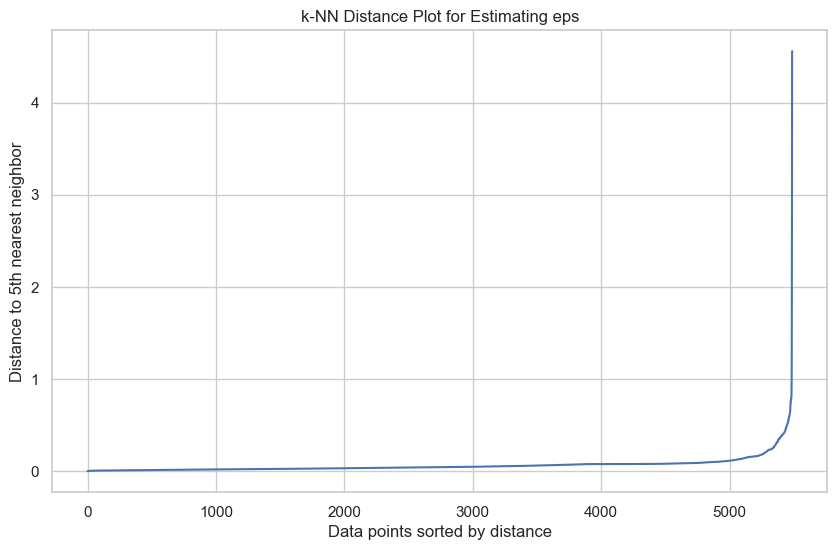

Silhouette Score: 0.5572787920375283


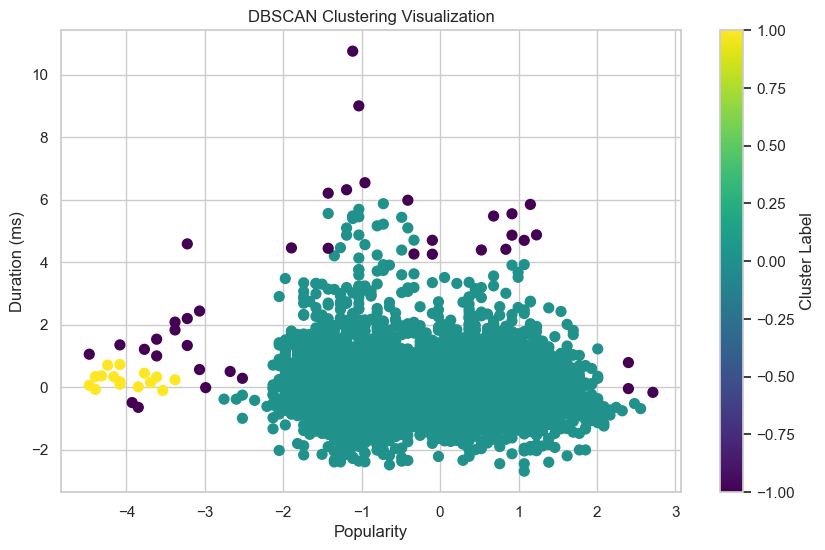

In [52]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming you have your DataFrame 'df' and a fitted DBSCAN model


# Step 1: k-NN to estimate a good `eps`
neighbors = NearestNeighbors(n_neighbors=5)  # k is usually set to min_samples
neighbors_fit = neighbors.fit(x)
distances, indices = neighbors_fit.kneighbors(x)

# Sort and plot the distances
distances = np.sort(distances[:, 4])  # 4 because we used 5 neighbors
plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.ylabel("Distance to 5th nearest neighbor")
plt.xlabel("Data points sorted by distance")
plt.title("k-NN Distance Plot for Estimating eps")
plt.show()

# Step 2: Based on the elbow point, choose an appropriate `eps` value
eps = 0.4  # adjust based on plot
min_samples = 5

# Step 3: Apply DBSCAN with the new parameters
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(x)

# Evaluate the Silhouette Score again
score = silhouette_score(x, dbscan.labels_)
print(f'Silhouette Score: {score}')

# Step 4: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(x['popularity'], x['duration_ms'], c=dbscan.labels_, cmap='viridis', s=50)
plt.xlabel('Popularity')
plt.ylabel('Duration (ms)')
plt.title('DBSCAN Clustering Visualization')
plt.colorbar(label='Cluster Label')
plt.show()


In [53]:
# Save the new dataset with cluster labels to the current working directory
df.to_csv('english_spotify_tracks_clusters.csv', index=False)

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine features into a single string for vectorization
df['combined_features'] = df['name'] + " " + df['artist'] + " " + df['genre']

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features into vectors
tfidf_matrix = tfidf_vectorizer.fit_transform(df['combined_features'])

# Display the shape of the resulting TF-IDF matrix
tfidf_matrix.shape


(5488, 6292)

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize the 'title' column
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['name'])

# Convert to a dense matrix for further processing
tfidf_dense = tfidf_matrix.todense()

In [56]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Combine TF-IDF vectors with other features
features = np.hstack((tfidf_dense, df[['popularity', 'duration_ms']].values))

# If you have encoded the genre, include it as well
if 'genre_encoded' in df.columns:
    features = np.hstack((features, df[['genre_encoded']].values))

# Ensure features is a numpy array
features = np.asarray(features)

# Standardize the combined features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


In [57]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity matrix
cosine_sim = cosine_similarity(scaled_features, scaled_features)

In [60]:
# Assuming cosine_sim is your cosine similarity matrix
np.save('cosine_similarity_matrix.npy', cosine_sim)

In [61]:
def recommend_songs(song_name, df, cosine_sim, top_n=10):
    # Get the index of the song
    idx = df.index[df['name'] == song_name][0]
    
    # Get the cluster of the song
    song_cluster = df.loc[idx, 'cluster']
    
    # Get indices of songs in the same cluster
    cluster_indices = df[df['cluster'] == song_cluster].index
    
    # Compute similarity scores for songs in the same cluster
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Filter scores by cluster
    sim_scores = [score for score in sim_scores if score[0] in cluster_indices]
    
    # Sort by similarity score
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the indices of the top n similar songs
    sim_scores = sim_scores[1:top_n+1]  # Exclude the first one (it's the song itself)
    
    # Get the song ids of the top n recommendations
    song_indices = [i[0] for i in sim_scores]
    
    return df.iloc[song_indices][['name', 'artist', 'genre']]

# Example: Recommend 5 songs similar to a given song id
recommendations = recommend_songs(song_name='Espresso', df=df, cosine_sim=cosine_sim, top_n=10)
print(recommendations)


                     name                         artist genre
3    Please Please Please              Sabrina Carpenter   pop
11                    Who                          Jimin   pop
44              As It Was                   Harry Styles   pop
84                    Who                          Jimin   pop
88                    Who                          Jimin   pop
92                    Who                          Jimin   pop
96             Take on Me                           a-ha   pop
796     Where Are You Now  Lost Frequencies, Calum Scott   pop
152    i am not who i was                    Chance Peña   pop
180   Something About You             Eyedress, Dent May   pop
